# ANLY-590 Assignment 1

## Yingjie(Chelsea) Wang

### Q1 
Regularization. Using the accompanying Hitters dataset, we will explore
regression models to predict a player's Salary from other variables. You must
python.

### 1.1
Use LASSO regression to predict Salary from the other numeric predictors.
Create a visualization of the coefficient trajectories. Comment on which are the
final three predictors that remain in the model. Use cross-validation to find the
optimal value of the regularization penality. How many predictors are left in
that model?

In [1]:
import numpy as np
import pandas as pd
# Load Hitters Dataset
data = pd.read_csv('Data/Hitters.csv', index_col=0)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2]:
# Some Exploratory Data Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 52.8+ KB


In [3]:
# Only keep numerical values and drop na values
numeric_df = data._get_numeric_data().dropna(axis=0)
numeric_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [4]:
# Some Exploratory Data Analysis
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 17 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
HmRun      263 non-null int64
Runs       263 non-null int64
RBI        263 non-null int64
Walks      263 non-null int64
Years      263 non-null int64
CAtBat     263 non-null int64
CHits      263 non-null int64
CHmRun     263 non-null int64
CRuns      263 non-null int64
CRBI       263 non-null int64
CWalks     263 non-null int64
PutOuts    263 non-null int64
Assists    263 non-null int64
Errors     263 non-null int64
Salary     263 non-null float64
dtypes: float64(1), int64(16)
memory usage: 37.0+ KB


In [5]:
# Specify the name of the target
target = 'Salary'

# Get the target vector
Y = numeric_df[target]

# Specify the name of the features
features = list(numeric_df.drop(target, axis=1).columns)

# Get the feature vector
X = numeric_df[features]

In [6]:
# Normalize the data to improve the performance
from sklearn import preprocessing
X_normalized = preprocessing.normalize(X)

In [7]:
# generate an array of alpha values ranging from very big to very small
alphas = 10**np.linspace(1,-2,100)
alphas

array([10.        ,  9.32603347,  8.69749003,  8.11130831,  7.56463328,
        7.05480231,  6.57933225,  6.13590727,  5.72236766,  5.33669923,
        4.97702356,  4.64158883,  4.32876128,  4.03701726,  3.76493581,
        3.51119173,  3.27454916,  3.05385551,  2.84803587,  2.65608778,
        2.47707636,  2.3101297 ,  2.15443469,  2.009233  ,  1.87381742,
        1.7475284 ,  1.62975083,  1.51991108,  1.41747416,  1.32194115,
        1.23284674,  1.149757  ,  1.07226722,  1.        ,  0.93260335,
        0.869749  ,  0.81113083,  0.75646333,  0.70548023,  0.65793322,
        0.61359073,  0.57223677,  0.53366992,  0.49770236,  0.46415888,
        0.43287613,  0.40370173,  0.37649358,  0.35111917,  0.32745492,
        0.30538555,  0.28480359,  0.26560878,  0.24770764,  0.23101297,
        0.21544347,  0.2009233 ,  0.18738174,  0.17475284,  0.16297508,
        0.15199111,  0.14174742,  0.13219411,  0.12328467,  0.1149757 ,
        0.10722672,  0.1       ,  0.09326033,  0.0869749 ,  0.08

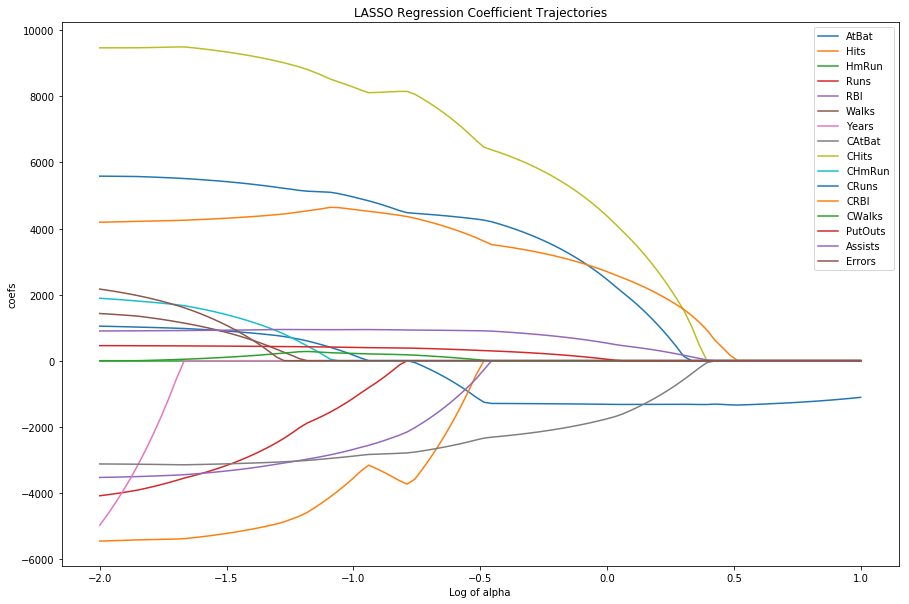

In [10]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
import matplotlib.pyplot as plt

# LASSO Regression Coefficient Trajectories
lasso = Lasso()
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_normalized, Y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(15,10))  
ax = plt.gca()
ax.plot(np.log10(alphas), coefs)
plt.title('LASSO Regression Coefficient Trajectories')
plt.axis('tight')
plt.legend((X.columns))
plt.xlabel('Log of alpha')
plt.ylabel('coefs')
plt.show()

In [11]:
lasso.set_params(alpha=np.exp(0.95))
lasso.fit(X_normalized, Y)
print('The coefficients of Lasso Regression are \n', lasso.coef_)
print('The three predictors left in the model from the coefficient trajectories \n', list(X.columns[np.absolute( lasso.coef_) > 0]))

The coefficients of Lasso Regression are 
 [-1318.97048736    -0.             0.             0.
    -0.            -0.            -0.           -29.59377997
     0.             0.             0.           737.44069599
     0.            -0.             0.            -0.        ]
The three predictors left in the model from the coefficient trajectories 
 ['AtBat', 'CAtBat', 'CRBI']


In [12]:
# Use cross-validation to find the optimal vaule of the regularization penalty
lassocv = LassoCV(alphas = None, cv = 10)
lassocv_fit = lassocv.fit(X_normalized, Y)
lassocv_coef = lassocv_fit.coef_
lassocv_score = lassocv_fit.score(X_normalized, Y)
lassocv_alpha = lassocv_fit.alpha_
print('The optimal vaule of the regularization penalty is:', lassocv_alpha)
print('The coefficient of determination R^2 of the prediction is ', lassocv_score)

The optimal vaule of the regularization penalty is: 0.1371821429861081
The coefficient of determination R^2 of the prediction is  0.5673333088850765


In [13]:
# Since regularization (L1) can lead to zero coefficients, i.e. some of the features are completely neglected for the evaluation of output. 
# So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.
print('The coefficients of CV are \n', lassocv_coef)
print('The predictors left in the model with highest weights are \n', list(X.columns[np.argsort(np.absolute(lassocv_coef))]))

The coefficients of CV are 
 [   -0.         -3444.65714893    -0.          -402.98421592
 -2375.14007167     0.            -0.         -2816.44983573
  8134.59612707     0.          4660.10589116  4447.07901303
   192.86762676   388.22612943   936.132407       0.        ]
The predictors left in the model with highest weights are 
 ['AtBat', 'HmRun', 'Walks', 'Years', 'CHmRun', 'Errors', 'CWalks', 'PutOuts', 'Runs', 'Assists', 'RBI', 'CAtBat', 'Hits', 'CRBI', 'CRuns', 'CHits']


### 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross-validation to find the optimal vaule of the regularization penalty.

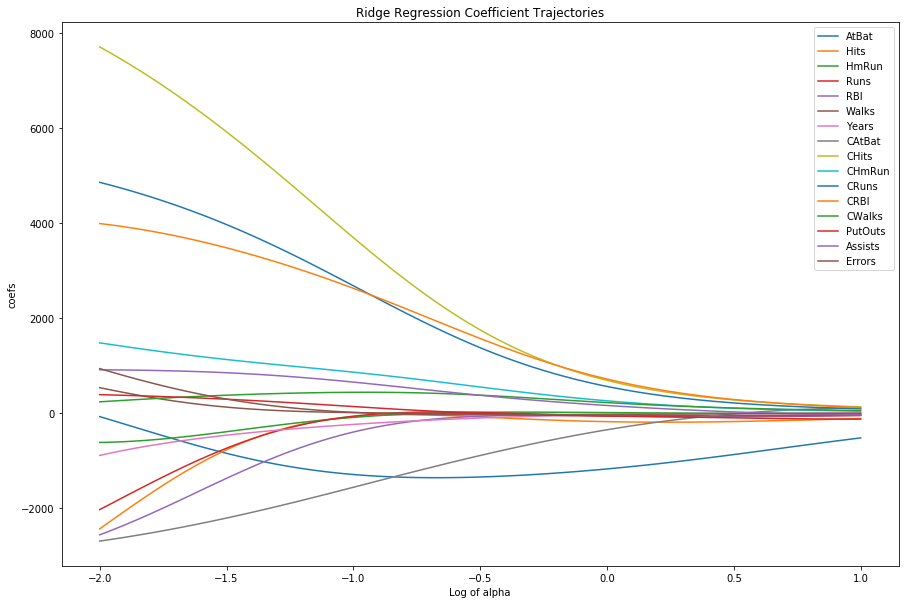

In [14]:
# Ridge Regression Coefficient Trajectories
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_normalized, Y)
    coefs.append(ridge.coef_)
    
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(np.log10(alphas), coefs)
plt.title('Ridge Regression Coefficient Trajectories')
plt.axis('tight')
plt.legend((X.columns))
plt.xlabel('Log of alpha')
plt.ylabel('coefs')
plt.show()

In [15]:
# Use cross-validation to find the optimal vaule of the regularization penalty
ridgecv = RidgeCV(alphas = alphas)
ridgecv_fit = ridgecv.fit(X_normalized, Y)
ridgecv_coef = ridgecv_fit.coef_
ridgecv_score = ridgecv_fit.score(X_normalized, Y)
ridgecv_alpha = ridgecv_fit.alpha_

print('The optimal vaule of the regularization penalty is:', ridgecv_alpha)
print('The coefficient of determination R^2 of the prediction is ', ridgecv_score)

The optimal vaule of the regularization penalty is: 0.01
The coefficient of determination R^2 of the prediction is  0.5689683953484218


In [16]:
# Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.
print('The coefficients of CV are \n', ridgecv_coef)

The coefficients of CV are 
 [  -81.09980204 -2445.090127    -625.53258001 -2039.5633603
 -2570.92126061   529.12104479  -898.39388278 -2703.04300196
  7706.26647656  1472.5923932   4853.16668405  3985.26453268
   230.413212     381.60308834   905.05919871   930.15581308]


### Q2
Short Answer. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

$\textbf{Bias}$ is described as the difference between the expected prediction of the model and the true value which we are trying to predict. In the other word, bias measures how good the model fits the data. In this case, we say the model is underfitting.

$\textbf{Variance}$ is described as the variability of a model prediction for a given data point. In the other word, model with high variance pays too much attention to training data and does not generalize on the data which it hasn’t seen before. In this case, we say this model is overfitting.

$\textbf{Bias-variance tradeoff}$ indicates that if the model is too simple and has few features then it may have high bias and low variance. On the other hand if the model is very complex and has a lot of features then it may have high variance and low bias. 

By using $\textbf{regularization}$, we want to penalize or adjust each weights of the independent variables so that it makes a good prediction on test set that it has not seen before. 

In our question, lasso regression can lead to zero coefficients, i.e. some of the features are completely neglected for the evaluation of output. Therefore, lasso regression not only helps in reducing over-fitting but it can help us in feature selection. Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.

From the lasso coefficient trajectories plots, the smaller penalty(alpha) is, the larger the weight of coefficients, which may cause overfitting. The larger penalty(alpha) is, the smaller the weight of coefficients, which can reduce the complexity of the model.